# Dimension Reduction

The dimensional space of a dataset represents the n features chosen. In Machine Learning, the choice of features is essential. By choosing too many features, the dataset becomes more complicated and can lead to overfitting. Overfitting is where the model is not generalized enough, and so, when the model starts looking at data outside of the training set, it completely fails.

Dimension reduction is therefore the act of taking a higher dimension dataset, a dataset with many features, and reducing it to the most influential and deterministic features.

The dataset that will be used throughout this exercise is the agaricus-lepiota dataset, where the target is edibility.

# Feature Selection Using a Classifier Evaluator

The first step in choosing the most discriminative features is by evaluating their importance to the set. 


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

agar_df = pd.read_csv('agaricus-lepiota.data')

y = pd.get_dummies(agar_df['edibility'], dtype=float)
X = pd.get_dummies(agar_df.drop(columns='edibility'), dtype=float)


print(X.shape)

skb = SelectKBest(chi2, k=2)
skb.fit(X, y)
X_new = skb.transform(X)

print(X_new.shape)

# Fetch the selected feature indices and print the corresponding feature names
print("Based on scikit's SelectKBest, the features with the highest F-statistic score is ")
for index in skb.get_support(indices=True):
    print("feature " + str(index+1) + " : " + X.columns[index])

(8124, 117)
(8124, 2)
Based on scikit's SelectKBest, the features with the highest F-statistic score is 
feature 25 : odor_f
feature 28 : odor_n


Based on the result from the Chai-Squared performed in the code snippet above, the most discriminative features for this dataset seems to be odor_f and odor_n. odor_f is a foul odor and odor_n is no odor.

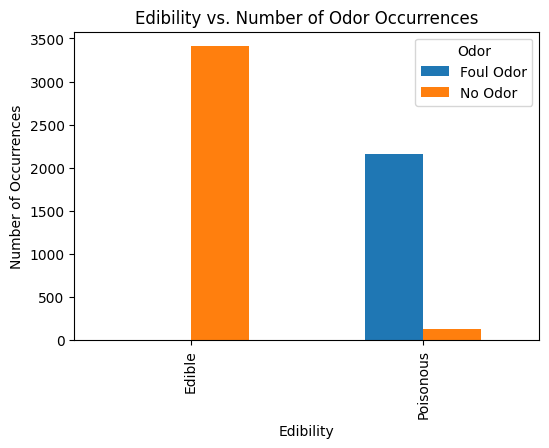

In [41]:
edibility_map = {
    'e' : 'Edible',
    'p' : 'Poisonous'
}

odor_map = {
    'odor_n' : 'No Odor',
    'odor_f' : 'Foul Odor'
}

# edibility_count = agar_df['edibility'].value_counts()
# edibility_count.index = edibility_count.index.map(edibility_map)

new_df = pd.DataFrame({
    'edibility': agar_df['edibility'],
    'odor_f': X['odor_f'],
    'odor_n': X['odor_n']
})

edibility_count = new_df['edibility'].value_counts()
edibility_labels = edibility_count.index.map(edibility_map)

grouped = new_df.groupby('edibility')[['odor_f', 'odor_n']].sum()

ax = grouped.plot(kind='bar', figsize=(6, 4))

# Set labels and title
plt.xlabel('Edibility')
plt.ylabel('Number of Occurrences')
plt.title('Edibility vs. Number of Odor Occurrences')

# Display the legend
odor_labels = [odor_map[col] for col in grouped.columns]
ax.legend(odor_labels, title='Odor', loc='upper right')

ax.set_xticklabels(edibility_labels)



# Show the plot
plt.show()

# Feature Variance

Original space: (8124, 117)
PCA space: (8124, 3)


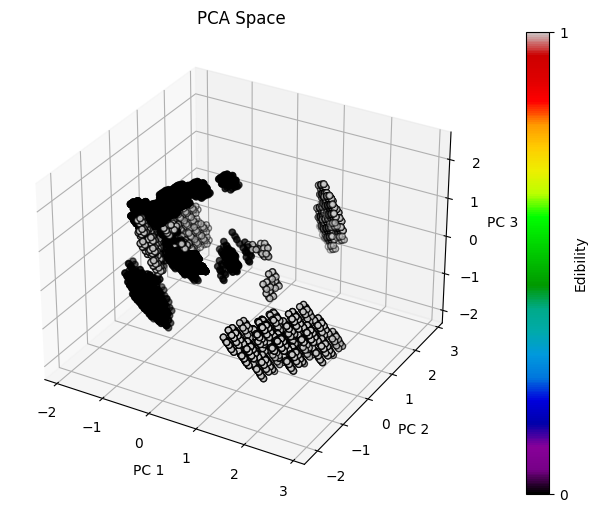

Loadings for PC1:
                        Feature  Loading for PC1
20                   bruises?_f         0.280687
37                 gill-color_b         0.229633
102         spore-print-color_w         0.226061
51                 stalk-root_?         0.223792
57   stalk-surface-above-ring_k         0.215801
..                          ...              ...
58   stalk-surface-above-ring_s        -0.200537
35                  gill-size_b        -0.202078
27                       odor_n        -0.207009
21                   bruises?_t        -0.280687
94                  ring-type_p        -0.294725

[117 rows x 2 columns]


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets



print("Original space:",X.shape)
pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)

print("PCA space:",Xpca.shape)



# Original Plot

# fig = plt.figure(1, figsize=(12, 6))
# ax = fig.add_subplot(111, projection='3d')


# scatter = ax.scatter(X['odor_n'], X['odor_f'], X['cap-color_b'], c=agar_df['edibility'].map({'e': 0, 'p': 1}),
#                      cmap=plt.cm.nipy_spectral, edgecolor='k')


# ax.set_title("Original Space")

# # Add colorbar for labels
# cbar = plt.colorbar(scatter, ax=ax, ticks=[0, 1], orientation='vertical')
# cbar.set_label('Edibility', rotation=90)

# plt.show()



# PCA Plot
fig = plt.figure(1, figsize=(14, 6))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=agar_df['edibility'].map({'e': 0, 'p': 1}),
                     cmap=plt.cm.nipy_spectral, edgecolor='k')


ax.set_title("PCA Space")

# Add colorbar for labels
cbar = plt.colorbar(scatter, ax=ax, ticks=[0, 1], orientation='vertical')
cbar.set_label('Edibility', rotation=90)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

In [69]:
# Access loadings for the first principal component (PC1)
loadings_pc1 = pca.components_[0]

# Create a DataFrame to display feature names and their loadings for PC1
loadings_df = pd.DataFrame({'Feature': X.columns, 'Loading for PC1': loadings_pc1})
loadings_df = loadings_df.sort_values(by='Loading for PC1', ascending=False)

print("Loadings for PC1:")
print(loadings_df)

# Access loadings for the first principal component (PC1)
loadings_pc2 = pca.components_[1]

# Create a DataFrame to display feature names and their loadings for PC1
loadings_df = pd.DataFrame({'Feature': X.columns, 'Loading for PC2': loadings_pc2})
loadings_df = loadings_df.sort_values(by='Loading for PC2', ascending=False)

print("Loadings for PC2")
print(loadings_df)

# Access loadings for the first principal component (PC1)
loadings_pc3 = pca.components_[2]

# Create a DataFrame to display feature names and their loadings for PC1
loadings_df = pd.DataFrame({'Feature': X.columns, 'Loading for PC3': loadings_pc3})
loadings_df = loadings_df.sort_values(by='Loading for PC3', ascending=False)

print("Loadings for PC3")
print(loadings_df)

Loadings for PC1:
                        Feature  Loading for PC1
20                   bruises?_f         0.280687
37                 gill-color_b         0.229633
102         spore-print-color_w         0.226061
51                 stalk-root_?         0.223792
57   stalk-surface-above-ring_k         0.215801
..                          ...              ...
58   stalk-surface-above-ring_s        -0.200537
35                  gill-size_b        -0.202078
27                       odor_n        -0.207009
21                   bruises?_t        -0.280687
94                  ring-type_p        -0.294725

[117 rows x 2 columns]
Loadings for PC2
                     Feature  Loading for PC2
96       spore-print-color_h         0.269686
92               ring-type_l         0.263788
52              stalk-root_b         0.256815
24                    odor_f         0.223614
49             stalk-shape_e         0.213318
..                       ...              ...
71  stalk-color-above-ring_w   

Principal component 1 seems to display the highest degree of variance. On this axis, there is a clear division between the different clusters.

## Overlap in PCA and Classifier Evaluator

From looking at the significance of the different features in creating the principal components, there is suprisingly little overlap. For the first principal component, odor_n, which was the most significant according to the f-statistical scores, had little effect on the final result.